In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
import seaborn as sns

<Axes: xlabel='Gender', ylabel='count'>

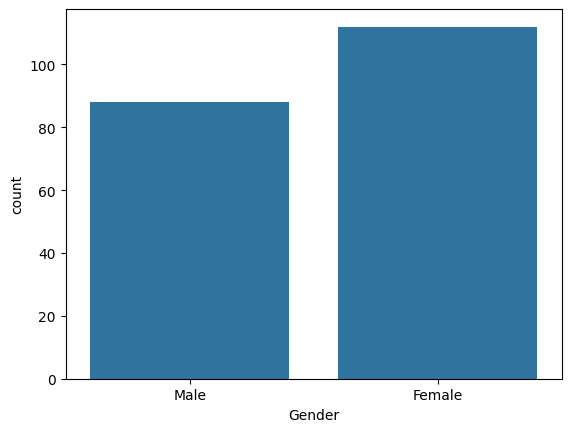

In [9]:
sns.countplot(data=df,x='Gender')

In [10]:
X=df.iloc[:,[3,4]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [11]:
from sklearn.cluster import KMeans

In [12]:
## Using elbow method

In [13]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS values')

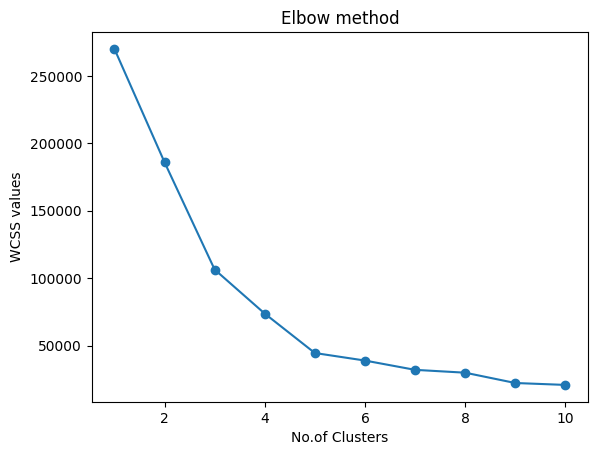

In [14]:
plt.plot(range(1,11),wcss,marker='o')
plt.title("Elbow method")
plt.xlabel("No.of Clusters")
plt.ylabel("WCSS values")

In [16]:
#Using optimal cluster=5


In [17]:
model=KMeans(n_clusters=5,init="k-means++",random_state=0)

In [18]:
y_pred=model.fit_predict(X)
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [26]:
X=np.array(X)

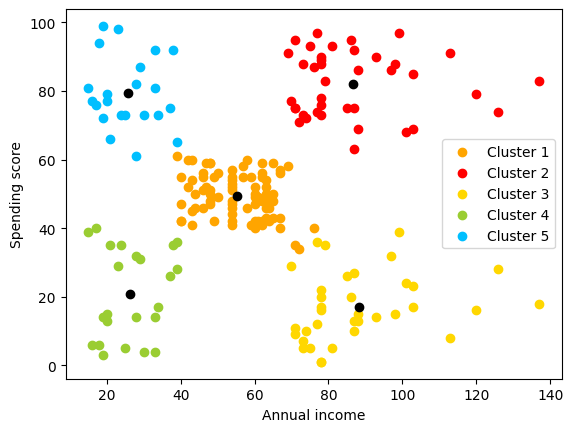

In [28]:
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1], color='orange', label='Cluster 1')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1], color='red', label='Cluster 2')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1], color='gold', label='Cluster 3')
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1], color='yellowgreen', label='Cluster 4')
plt.scatter(X[y_pred == 4,0], X[y_pred == 4,1], color='deepskyblue', label='Cluster 5')
centroids = model.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],color='black')
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.legend()
plt.show()